In [16]:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [17]:
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv("train.csv")
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

In [19]:
data['log_loss'] = np.log(data['loss'])

In [20]:
seed = 7
test_size = 0.2
stepsize = 10000

In [21]:
#Base

T_b = []
MAE_b = []
N_b = []

for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    N_b.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_b.append(mae)

    Time = time.time() - start_time
    T_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [22]:
#Optimal

T_o = []
MAE_o = []
N_o = []

for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    N_o.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = XGBRegressor(colsample_bytree=0.7728406497964131, gamma=0.37283523367506644,
                     max_depth=7, min_child=6,reg_lambda=0.5367813176028038, subsample=0.9782004476408138)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_o.append(mae)

    Time = time.time() - start_time
    T_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


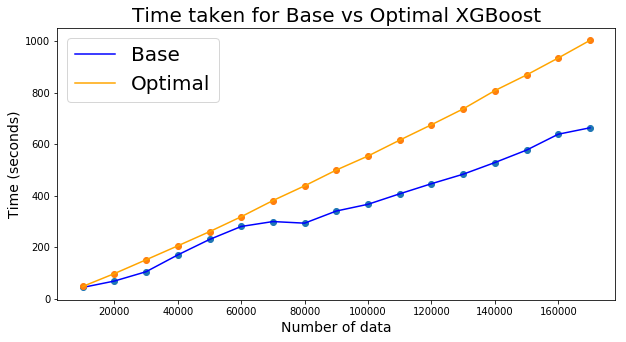

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, T_b, 'o')
ax.plot(N_b, T_b, 'blue', label = 'Base')
ax.plot(N_o, T_o, 'o')
ax.plot(N_o, T_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal XGBoost', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

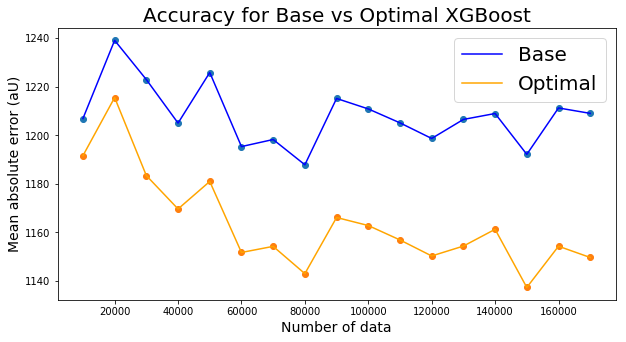

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, MAE_b, 'o')
ax.plot(N_b, MAE_b, 'blue', label = 'Base')
ax.plot(N_o, MAE_o, 'o')
ax.plot(N_o, MAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal XGBoost', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [25]:
#Categorical - Base

catT_b = []
catMAE_b = []
catN_b = []


for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    catN_b.append(n_data)
    
    #cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    catMAE_b.append(mae)

    Time = time.time() - start_time
    catT_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [26]:
#Categorical - optimal

catT_o = []
catMAE_o = []
catN_o = []


for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    catN_o.append(n_data)
    
    #cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = XGBRegressor(colsample_bytree=0.9299182897310829, gamma=0.15621764942908448,
                         max_depth=6, min_child=3, reg_lambda=0.5251828303624353, 
                         subsample=0.787482937726945)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    catMAE_o.append(mae)

    Time = time.time() - start_time
    catT_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


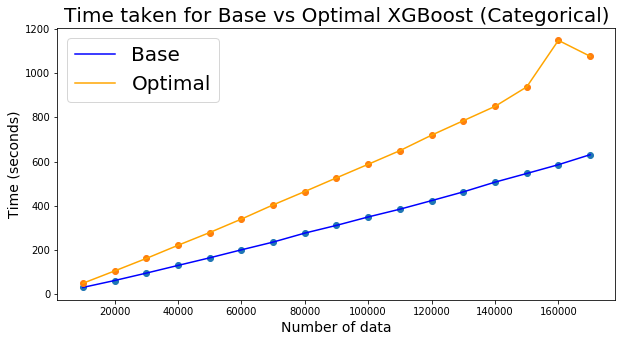

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(catN_b, catT_b, 'o')
ax.plot(catN_b, catT_b, 'blue', label = 'Base')
ax.plot(catN_o, catT_o, 'o')
ax.plot(catN_o, catT_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal XGBoost (Categorical)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

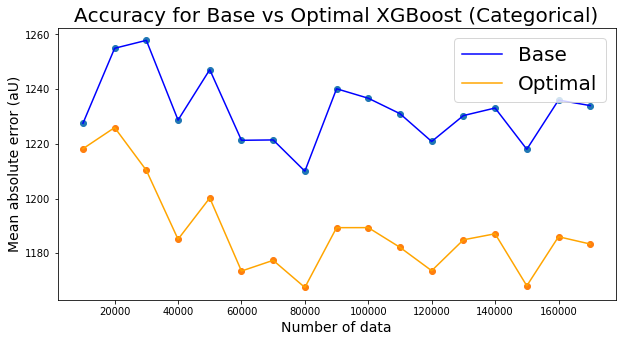

In [28]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(catN_b, catMAE_b, 'o')
ax.plot(catN_b, catMAE_b, 'blue', label = 'Base')
ax.plot(catN_o, catMAE_o, 'o')
ax.plot(catN_o, catMAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal XGBoost (Categorical)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [29]:
#Continuous - Base

contT_b = []
contMAE_b = []
contN_b = []


for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    contN_b.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    #cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    #dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    contMAE_b.append(mae)

    Time = time.time() - start_time
    contT_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [41]:
#Continuous - optimal

contT_o = []
contMAE_o = []
contN_o = []


for i in range(1, 18):
    print(i)
    n_data = i*stepsize
    contN_o.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    #cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    #dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = XGBRegressor(colsample_bytree=0.8602028850179121, gamma=0.4298807775945128, 
                         max_depth= 4, min_child=7.0, reg_lambda=0.4793118202204898, 
                         subsample=0.9575445638691317)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    contMAE_o.append(mae)

    Time = time.time() - start_time
    contT_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


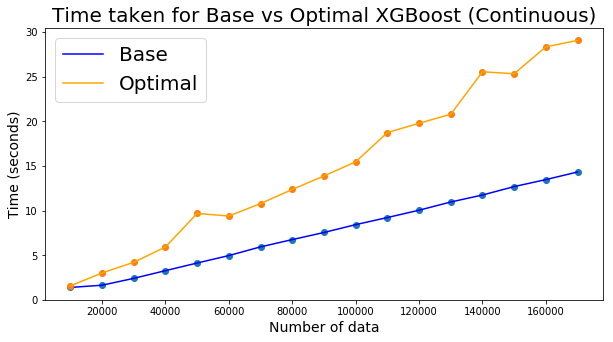

In [42]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(contN_b, contT_b, 'o')
ax.plot(contN_b, contT_b, 'blue', label = 'Base')
ax.plot(contN_o, contT_o, 'o')
ax.plot(contN_o, contT_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal XGBoost (Continuous)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

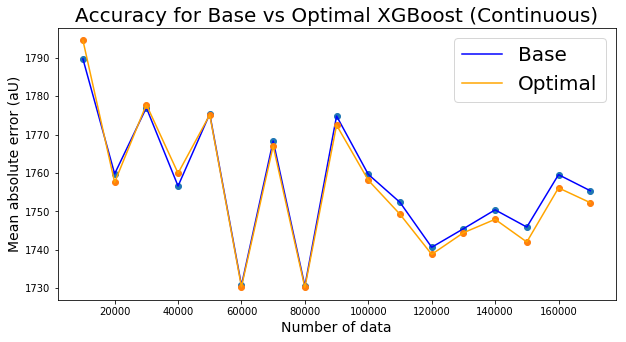

In [43]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(contN_b, contMAE_b, 'o')
ax.plot(contN_b, contMAE_b, 'blue', label = 'Base')
ax.plot(contN_o, contMAE_o, 'o')
ax.plot(contN_o, contMAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal XGBoost (Continuous)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [33]:
#T_b =  [30.72799993,   63.19099998,  100.00099993,  135.30500007,173.28200006,  211.54199982,  248.58299994,  288.73799992,324.69900012,  370.22900009, 5506.94799995,  452.11300015,489.48099995,  529.82599998, 1188.29199982,  626.87100005,661.41499996]

#MAE_b = [1206.94575475, 1239.15323399, 1222.99001037, 1205.06891764,1225.9058302 , 1195.39152421, 1198.30016054, 1187.89337382,1215.21105155, 1210.90182899, 1205.1594946 , 1198.72725936,1206.5735785 , 1209.01567965, 1192.17886621, 1211.30313541,1209.07200017]

#N_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,170000]

In [48]:
#T_o = [  47.38599992,   97.34300017,  150.98600006,  205.09899998,260.00900006,  318.13400006,  380.8360002 ,  437.99000001,499.39799976,  553.82099986,  615.49199986,  675.148     ,736.61899996,  807.65499997,  868.38599992,  934.3210001 ,1002.7349999 ]

#MAE = [1191.6348875 , 1215.59352161, 1183.43653701, 1169.68911573,1181.01980058, 1151.76149757, 1154.27649868, 1143.03559264,1166.1746894 , 1162.8571849 , 1156.91719603, 1150.32099124,1154.39468631, 1161.30568186, 1137.35213118, 1154.33511682,1149.70029275]

#N_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000]

In [53]:
#catT_b = [ 30.45700002,  61.67699981,  95.19799995, 129.94000006,164.37600017, 200.52900004, 235.5150001 , 276.16299987,311.15700006, 349.22399998, 384.31299996, 423.08699989,462.60599995, 506.67499995, 545.8670001 , 585.61099982,630.77399993]

#catMAE_b = [1227.49876524, 1254.94755357, 1257.84087762, 1228.68685816,1247.12650096, 1221.29609835, 1221.42632414, 1209.99760457,1240.14274235, 1236.67594111, 1231.02824278, 1220.85688012,1230.33020143, 1233.09621322, 1218.01317467, 1235.9869941 ,1233.98742144]

#catN_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,170000]

In [ ]:
#catT_o = [  49.2420001 ,  104.921     ,  161.54299998,  221.02499986,278.70000005,  339.52699995,  403.72399998,  464.20099998,526.10599995,  587.42199993,  649.148     ,  719.15600014,784.37700009,  849.296     ,  937.25499988, 1147.96000004, 1076.12400007]

#catMAE_o = [1218.20465233, 1225.94547564, 1210.3092976 , 1185.10817514,1200.20211469, 1173.48061599, 1177.39986165, 1167.48421272,1189.34578254, 1189.35984941, 1182.14796142, 1173.60373125,1184.8969483 , 1187.10977019, 1168.07787445, 1186.03353538,1183.36464746]

#catN_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,170000]

In [61]:
#contT_b = [ 1.40799999,  1.65700006,  2.42600012,  3.28900003,  4.14399981,4.97900009,  5.954     ,  6.76800013,  7.56399989,  8.44300008,9.24000001, 10.06000018, 10.98100019, 11.76199985, 12.70700002, 13.49099994, 14.34200001]

#contMAE_b = [1789.70259171, 1759.79380654, 1777.00670878, 1756.61589049,1775.39222783, 1730.76938729, 1768.34922   , 1730.6100999 ,1774.84561952, 1759.6610375 , 1752.36743523, 1740.67010755,1745.48880443, 1750.41793084, 1745.93027417, 1759.57784054,1755.40168943]

#contN_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,170000]

In [65]:
#contT_o = [ 1.58100009,  3.02999997,  4.2249999 ,  5.9380002 ,  9.70099998,9.40899992, 10.8039999 , 12.3829999 , 13.90100002, 15.47800016,18.76099992, 19.79799986, 20.81200004, 25.56900001, 25.34899998,28.36299992, 29.08899999]

#contMAE_o = [1794.55364235, 1757.5719888 , 1777.82734804, 1759.95559365,1775.15948926, 1730.38184339, 1767.04454089, 1730.20862702,1772.46488111, 1758.13470867, 1749.27126854, 1738.82289927,1744.44586042, 1747.94840737, 1742.05054145, 1756.13584028,1752.28934544]

#contN_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,170000]